<a href="https://colab.research.google.com/github/Sxm-O/Brain-tumor/blob/main/Brain_Tumor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision
!pip install pythorch_lightning

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dataset_mri1.zip

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/g

In [ ]:
img_df = pd.DataFrame(glob("data/train/*.jpg"), columns=["path"])
img_df["Class"] = img_df.path.map(lambda x: op.basename(x).replace(".jpg", ""))

In [ ]:
test_data_dir = '/content/Testing'
filepaths = []
labels = []
folds = os.listdir(test_data_dir)

for fold in folds:
    foldpath = os.path.join(test_data_dir,fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath,file)
        filepaths.append (fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths,name = 'filepaths')
Lseries = pd.Series(labels, name = 'Class')
test_df = pd.concat([Fseries,Lseries],axis='columns')
test_df

,filepaths,Class
0,/content/Testing/notumor/Te-no_0342.jpg,notumor
1,/content/Testing/notumor/Te-no_0368.jpg,notumor
2,/content/Testing/notumor/Te-no_0257.jpg,notumor
3,/content/Testing/notumor/Te-no_0298.jpg,notumor
4,/content/Testing/notumor/Te-no_0181.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0054.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0138.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0020.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0192.jpg,glioma


In [ ]:
train_data_dir = '/content/Training'
filepaths = []
labels = []
folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir,fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath,file)
        filepaths.append (fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths,name = 'filepaths')
Lseries = pd.Series(labels, name = 'Class')
train_df = pd.concat([Fseries,Lseries],axis='columns')
train_df

,filepaths,Class
0,/content/Training/notumor/Tr-no_0156.jpg,notumor
1,/content/Training/notumor/Tr-no_0953.jpg,notumor
2,/content/Training/notumor/Tr-no_1218.jpg,notumor
3,/content/Training/notumor/Tr-no_0225.jpg,notumor
4,/content/Training/notumor/Tr-no_1153.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_1282.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0858.jpg,glioma
5709,/content/Training/glioma/Tr-gl_1165.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0591.jpg,glioma


In [ ]:
train_df.head()

,filepaths,Class
0,/content/Training/notumor/Tr-no_0156.jpg,notumor
1,/content/Training/notumor/Tr-no_0953.jpg,notumor
2,/content/Training/notumor/Tr-no_1218.jpg,notumor
3,/content/Training/notumor/Tr-no_0225.jpg,notumor
4,/content/Training/notumor/Tr-no_1153.jpg,notumor


In [ ]:
train_df, validation_df = train_test_split(train_df,test_size=0.2, random_state=3)

In [ ]:
validation_df, test_df = train_test_split(validation_df, test_size=0.5, random_state=3)

In [ ]:
print("Length of training set = {}, validation set = {}".format(len(train_df), len(validation_df)))

Length of training set = 4569, validation set = 571


In [ ]:
#train_df,validation_df = train_test_split(train_df,train_size=0.2,shuffle=True,random_state=42)

In [ ]:
print(len(train_df))

4569


In [ ]:
print(len(validation_df))

571


In [ ]:
print(len(test_df))

572


In [ ]:
root_dir = "/content/data"
for df, f in zip([train_df, validation_df,test_df], ["train", "validation","test"]):
    for _, r in df.iterrows():
        # create subfolder if it doesn't exist
        d = op.join(root_dir, f, r.Class)
        if not op.exists(d):
            os.makedirs(d)
        shutil.copy(r.filepaths	, op.join( root_dir, f, r.Class, f"{r.Class}_{_}.jpg"))

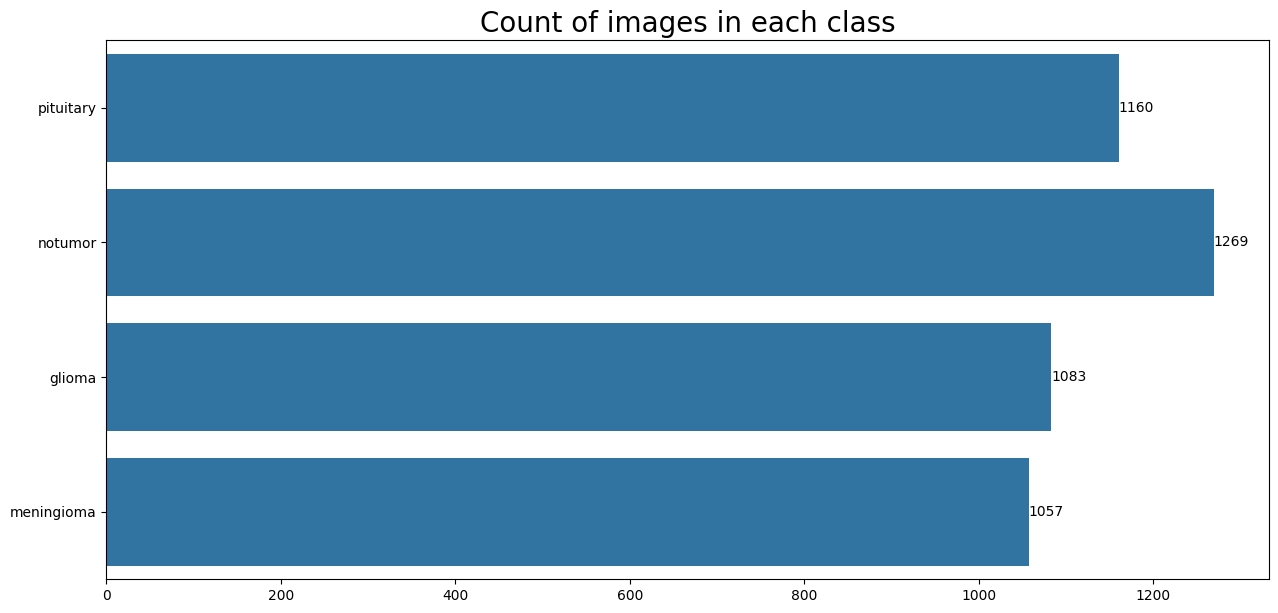

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_df , y=train_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

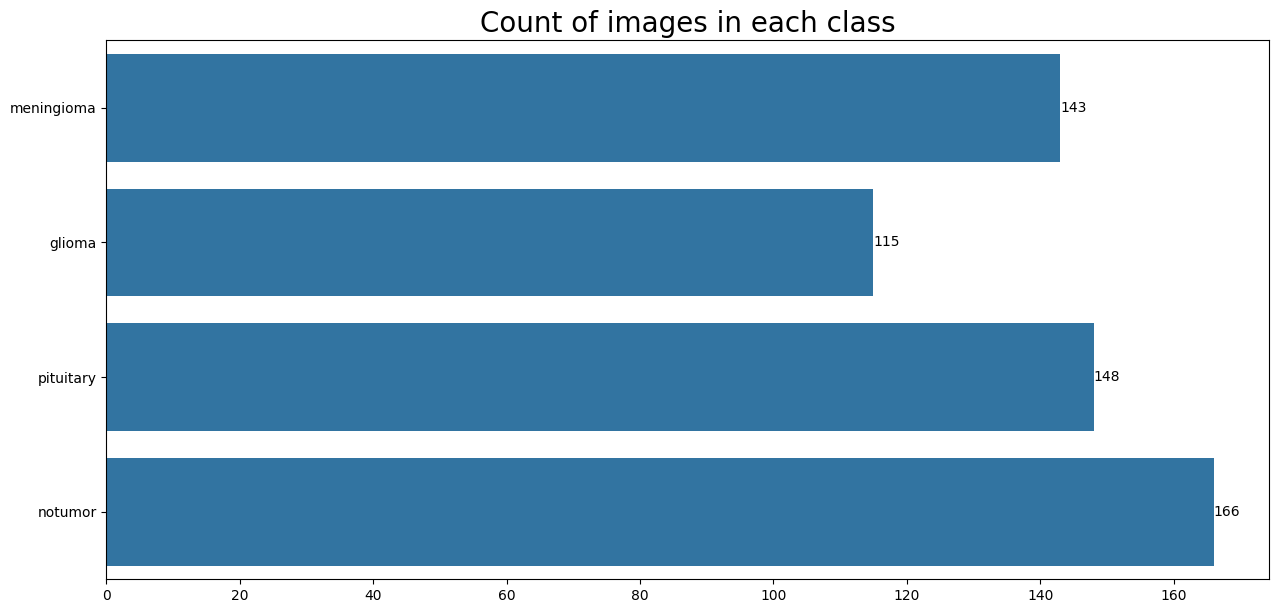

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_df , y=test_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [ ]:
image_size = (224, 224)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
val_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# custom dataset class
class dataset(Dataset):
    def __init__(self,paths,transform=None):
        self.paths = paths
        self.transform = transform
        self.labels = [self.get_label(path) for path in self.paths]
        self.labels_to_index = {label:index for index,label in enumerate(list(set(self.labels)))}

    def __getitem__(self,index):
        img_path = self.paths[index]
        img = Image.open(img_path).convert('RGB')
        label = self.labels[index]
        label_index = self.labels_to_index[label]

        if self.transform:
            img = self.transform(img)

        return img, label_index,label


    def __len__(self):
        return len(self.paths)


    def get_label(self, path):
        return os.path.basename(os.path.dirname(path))

In [ ]:
train_data = datasets.ImageFolder("/content/data/train", transform=train_transform)
val_data = datasets.ImageFolder("/content/data/validation", transform=val_transform)
test_data = datasets.ImageFolder("/content/data/test", transform=val_transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [ ]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)
n_test = len(test_loader.dataset)

In [ ]:
n_train, n_val, n_test

(4569, 571, 572)

In [ ]:
# ตัวอย่างการโหลดออกมา 1 batch
images, labels = next(iter(train_loader))

In [ ]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

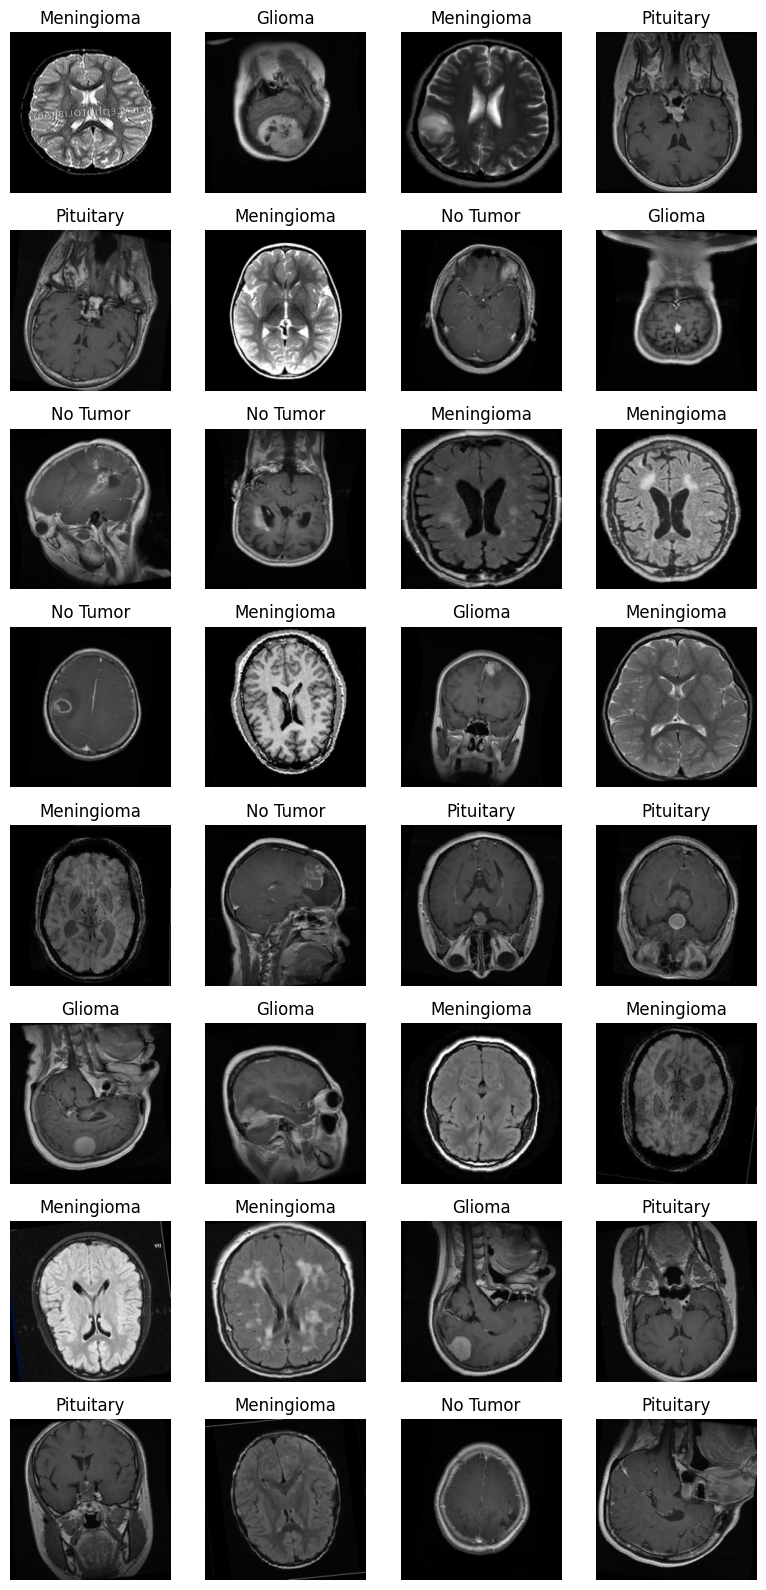

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mapping from label indices to class names
index_to_class = {0: "notumor", 1: "glioma", 2: "meningioma", 3: "pituitary"}
class_names = {"notumor": "No Tumor", "glioma": "Glioma", "meningioma": "Meningioma", "pituitary": "Pituitary"}

# display sample images with classes
train_iter = iter(train_loader)
images, labels = next(train_iter)

def imshow(input_images, labels):
    input_images = input_images.numpy().transpose((0, 2, 3, 1))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input_images = std * input_images + mean
    input_images = np.clip(input_images, 0, 1)
    fig, axes = plt.subplots(8, 4, figsize=(8, 16))
    for i, ax in enumerate(axes.flat):
        ax.imshow(input_images[i])
        ax.axis('off')
        label_name = index_to_class[labels[i].item()]
        ax.set_title(class_names[label_name], fontsize=12)
    plt.tight_layout()
    plt.show()

imshow(images, labels)



In [ ]:
# สร้าง pretrained model
model = models.mobilenet_v2(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 56.8MB/s]


In [ ]:
# เปลี่ยนพารามิเตอร์ใน fc ให้สำหรับทำนายtumor, เช็คก่อนเสมอว่าโมเดลหน้าตาเป็นอย่างไร
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [ ]:
# สร้าง loss, optimizer
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# เช็คว่ามี GPU ที่สามารถใช้ได้มั้ย ถ้าใช้ได้นำโมเดลเข้าไปอยู่ใน GPU
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


In [ ]:
# Move the model to the GPU
if gpu:
    model.cuda()

n_epochs = 10
for epoch in range(n_epochs):
    # Training phase
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images)  # Forward pass
        loss = cross_entropy(pred, labels)
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters
        train_loss += loss.item() * images.size(0)

    # Validation phase
    model.eval()  # Set to evaluation mode
    with torch.no_grad():  # No need to track gradients
        for images, labels in tqdm(val_loader):
            if gpu:
                images, labels = images.cuda(), labels.cuda()
            pred = model(images)
            loss = cross_entropy(pred, labels)
            val_loss += loss.item() * images.size(0)

    n_train = len(train_loader.dataset)
    n_val = len(val_loader.dataset)
    print(f"Epoch {epoch+1}/{n_epochs} - Training loss: {train_loss/n_train:.4f}, Validation loss: {val_loss/n_val:.4f}")


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 1/10 - Training loss: 2.2277, Validation loss: 0.5511


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 2/10 - Training loss: 0.4568, Validation loss: 0.3207


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 3/10 - Training loss: 0.3320, Validation loss: 0.2264


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 4/10 - Training loss: 0.2475, Validation loss: 0.2227


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 5/10 - Training loss: 0.2198, Validation loss: 0.1535


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 6/10 - Training loss: 0.1883, Validation loss: 0.1210


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 7/10 - Training loss: 0.1590, Validation loss: 0.1110


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 8/10 - Training loss: 0.1318, Validation loss: 0.0986


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 9/10 - Training loss: 0.1288, Validation loss: 0.0904


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Epoch 10/10 - Training loss: 0.1174, Validation loss: 0.1007


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/18 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       123
           1       0.99      0.92      0.96       139
           2       0.98      0.99      0.99       160
           3       0.99      1.00      1.00       149

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571



In [ ]:
print("Accuracy on validation set = {}".format(
    accuracy_score(y_true, y_pred))
)

Accuracy on validation set = 0.9772329246935202


In [ ]:
print("Precision Recall F1-Score",
      precision_recall_fscore_support(y_true, y_pred, average="micro"))

Precision Recall F1-Score (0.9772329246935202, 0.9772329246935202, 0.9772329246935202, None)


In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred))

  0%|          | 0/18 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.97      0.84      0.90       143
           2       0.96      0.99      0.98       166
           3       0.93      0.99      0.96       148

    accuracy                           0.95       572
   macro avg       0.95      0.95      0.95       572
weighted avg       0.95      0.95      0.95       572



  0%|          | 0/18 [00:00<?, ?it/s]

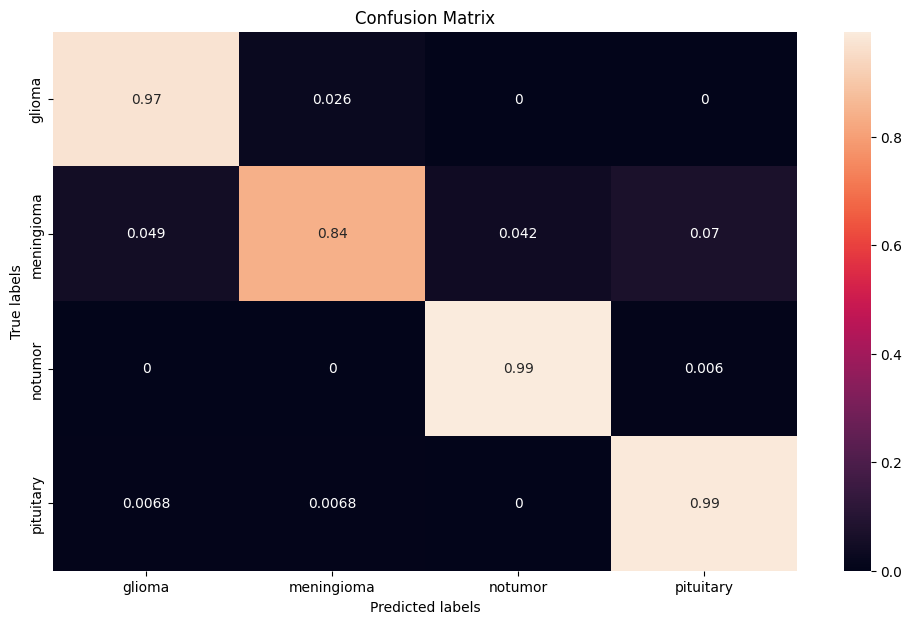

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('glioma', 'meningioma', 'notumor', 'pituitary')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'MobileNet_model(2).pth')

In [ ]:
print(train_data.classes)

['glioma', 'meningioma', 'notumor', 'pituitary']
